In [206]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
data=pd.read_csv('intracity_fare_train.csv')
fd=pd.DataFrame(data=data)

In [208]:
fd.head()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33
3,4,2016-04-26 18:10:09,NaN,NaN,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62


In [209]:
fd.describe()

,ID,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE
count,20000.000000,19325.000000,19325.000000,19337.000000,19337.000000,5648.000000,5648.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,20.111445,79.794135,20.129680,79.793273,15.447238,9.433605,30.066750,30.543050,251.926063
std,5773.647028,5.908449,4.939736,5.909585,4.941561,8.558223,5.779630,21.951902,12.123407,300.067490
min,1.000000,12.842900,72.835882,12.843029,72.835873,1.000000,0.000000,0.000000,0.000000,7.000000
25%,5000.750000,13.086064,77.093570,13.087377,77.087018,8.000000,4.000000,12.000000,22.000000,42.097500
50%,10000.500000,19.231625,77.705107,19.235435,77.706558,15.000000,9.000000,26.000000,31.000000,75.330000
75%,15000.250000,25.317237,82.990730,25.317921,82.990571,23.000000,14.000000,45.000000,40.000000,416.130000
max,20000.000000,28.770716,88.452179,28.770713,88.452149,30.000000,19.000000,95.000000,99.000000,1972.000000


In [210]:
fd.dtypes

ID                         int64
TIMESTAMP                 object
STARTING_LATITUDE        float64
STARTING_LONGITUDE       float64
DESTINATION_LATITUDE     float64
DESTINATION_LONGITUDE    float64
VEHICLE_TYPE              object
TOTAL_LUGGAGE_WEIGHT     float64
WAIT_TIME                float64
TRAFFIC_STUCK_TIME         int64
DISTANCE                   int64
FARE                     float64
dtype: object

In [211]:
fd[['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE','TOTAL_LUGGAGE_WEIGHT','WAIT_TIME','TRAFFIC_STUCK_TIME','FARE']]=fd[['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE','TOTAL_LUGGAGE_WEIGHT','WAIT_TIME','TRAFFIC_STUCK_TIME','FARE']].apply(pd.to_numeric)

In [212]:
fd.dtypes

ID                         int64
TIMESTAMP                 object
STARTING_LATITUDE        float64
STARTING_LONGITUDE       float64
DESTINATION_LATITUDE     float64
DESTINATION_LONGITUDE    float64
VEHICLE_TYPE              object
TOTAL_LUGGAGE_WEIGHT     float64
WAIT_TIME                float64
TRAFFIC_STUCK_TIME         int64
DISTANCE                   int64
FARE                     float64
dtype: object

In [213]:
str=fd['TIMESTAMP'][0]

In [214]:
import datetime

In [215]:
datetime.datetime.today().year
x=datetime.datetime(2016,5,27,18,10,9).weekday()
y=datetime.datetime(2016,5,27).weekday()
x
y

4

In [216]:
datetime.datetime(2016,4,27,18,10,9).weekday()

2

In [217]:

def fun_hr(row):
    str=row['TIMESTAMP']
    hr=int(str[11:13])   
    return hr

def fun_mi(row):
    str=row['TIMESTAMP']
    mi=int(str[14:16])
    return mi

def fun_yr(row):
    str=row['TIMESTAMP']
    yr=int(str[0:4])
    return yr

def fun_mo(row):
    str=row['TIMESTAMP']
    mo=int(str[5:7])
    return mo
  

def fun_day(row):
    str=row['TIMESTAMP']
    yr=int(str[:4])
    mn=int(str[5:7])
    dy=int(str[8:10])
      #week start from monday   monday=0
        #tues=1 wed =2.... sat=5 sun=6
    x=datetime.datetime(yr,mn,dy).weekday()
    return x

In [218]:
fd['HOUR']=fd.apply(lambda row:fun_hr(row),axis=1)
fd['MIN']=fd.apply(lambda row:fun_mi(row),axis=1)
fd['MONTH']=fd.apply(lambda row:fun_mo(row),axis=1)
fd['YEAR']=fd.apply(lambda row:fun_yr(row),axis=1)
fd['DAY']=fd.apply(lambda row:fun_day(row),axis=1)


fd.drop('TIMESTAMP',axis=1,inplace=True)


In [219]:
fd.drop('ID',axis=1,inplace=True)

In [220]:
 #week start from monday   monday=0
        #tues=1 wed =2.... sat=5 sun=6
fd.head()

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY
0,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09,6,59,1,2016,3
1,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99,22,23,6,2016,4
2,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2
3,NaN,NaN,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21,18,10,4,2016,1
4,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62,1,51,6,2016,2


In [221]:
fd['STARTING_LATITUDE'].mean()

fd['STARTING_LATITUDE'].fillna(value=fd['STARTING_LATITUDE'].mean(),inplace=True)

fd['STARTING_LONGITUDE'].fillna(value=fd['STARTING_LONGITUDE'].mean(),inplace=True)

fd['DESTINATION_LATITUDE'].fillna(value=fd['DESTINATION_LATITUDE'].mean(),inplace=True)

fd['DESTINATION_LONGITUDE'].fillna(value=fd['DESTINATION_LONGITUDE'].mean(),inplace=True)

In [222]:
#Fetch City
chukk = []
for i in range(20000):
    if ( (int(fd['STARTING_LATITUDE'][i])) == 28 or (int(fd['DESTINATION_LATITUDE'][i])) == 28 or (int(fd['STARTING_LONGITUDE'][i])) == 76 or (int(fd['DESTINATION_LONGITUDE'][i])) == 76 or ( (int(fd['STARTING_LATITUDE'][i])) == 28 and (int(fd['STARTING_LONGITUDE'][i])) == 77 ) or ( (int(fd['STARTING_LATITUDE'][i])) == 28 and (int(fd['STARTING_LONGITUDE'][i])) == 76 ) or ( (int(fd['DESTINATION_LATITUDE'][i])) == 28 and (int(fd['DESTINATION_LONGITUDE'][i])) == 77 ) or ((int(fd['DESTINATION_LATITUDE'][i])) == 28 and (int(fd['DESTINATION_LONGITUDE'][i])) == 76) ):
        chukk.append(1)
    elif (int(fd['STARTING_LATITUDE'][i])) == 25 or (int(fd['DESTINATION_LATITUDE'][i])) == 25 or (int(fd['STARTING_LONGITUDE'][i])) == 82 or (int(fd['STARTING_LONGITUDE'][i])) == 83 or (int(fd['DESTINATION_LONGITUDE'][i])) == 82 or (int(fd['DESTINATION_LONGITUDE'][i])) == 83:
        chukk.append(2)
    elif (int(fd['STARTING_LATITUDE'][i])) == 22 or (int(fd['DESTINATION_LATITUDE'][i])) == 22 or (int(fd['STARTING_LONGITUDE'][i])) == 88 or (int(fd['DESTINATION_LONGITUDE'][i])) == 88:
        chukk.append(3)
    elif (int(fd['STARTING_LATITUDE'][i])) == 19 or (int(fd['DESTINATION_LATITUDE'][i])) == 19 or (int(fd['STARTING_LONGITUDE'][i])) == 72 or (int(fd['DESTINATION_LONGITUDE'][i])) == 72:
        chukk.append(4)
    elif (int(fd['STARTING_LONGITUDE'][i])) == 80 or (int(fd['DESTINATION_LONGITUDE'][i])) == 80 or ( (int(fd['STARTING_LATITUDE'][i])) == 12 and (int(fd['STARTING_LONGITUDE'][i])) == 80 ) or ( (int(fd['STARTING_LATITUDE'][i])) == 13 and (int(fd['STARTING_LONGITUDE'][i])) == 80 ) or ( (int(fd['DESTINATION_LATITUDE'][i])) == 12 and (int(fd['DESTINATION_LONGITUDE'][i])) == 80 ) or ( (int(fd['DESTINATION_LATITUDE'][i])) == 13 and (int(fd['DESTINATION_LONGITUDE'][i])) == 80 ):
        chukk.append(5)
    elif (int(fd['STARTING_LONGITUDE'][i])) == 77 or (int(fd['DESTINATION_LONGITUDE'][i])) == 77 or ( (int(fd['STARTING_LATITUDE'][i])) == 12 and (int(fd['STARTING_LONGITUDE'][i])) == 77 ) or ( (int(fd['STARTING_LATITUDE'][i])) == 13 and (int(fd['STARTING_LONGITUDE'][i])) == 77 ) or ( (int(fd['DESTINATION_LATITUDE'][i])) == 12 and (int(fd['DESTINATION_LONGITUDE'][i])) == 77 ) or ( (int(fd['DESTINATION_LATITUDE'][i])) == 13 and (int(fd['DESTINATION_LONGITUDE'][i])) == 77 ):
        chukk.append(6)
    else:
        chukk.append(0)

fd['CITY']=chukk

In [223]:
fd.head()

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY
0,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09,6,59,1,2016,3,5
1,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99,22,23,6,2016,4,1
2,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2,2
3,20.111445,79.794135,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21,18,10,4,2016,1,1
4,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62,1,51,6,2016,2,3


In [224]:
fd.drop('STARTING_LATITUDE',axis=1,inplace=True)
fd.drop('STARTING_LONGITUDE',axis=1,inplace=True)
fd.drop('DESTINATION_LATITUDE',axis=1,inplace=True)
fd.drop('DESTINATION_LONGITUDE',axis=1,inplace=True)

In [225]:
f1=fd
con=f1['TOTAL_LUGGAGE_WEIGHT']>0

f1=f1[con]

f1.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY
1,Taxi AC,7.0,9.0,66,34,985.99,22,23,6,2016,4,1
2,Taxi Non AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2,2
6,taxi Non ac,22.0,0.0,61,34,586.36,16,26,11,2015,2,4
8,Taxi AC,12.0,18.0,69,43,1122.08,14,41,8,2016,0,2
10,Taxi AC,17.0,19.0,39,41,901.34,5,18,1,2015,4,4


In [226]:
arr=fd.columns

In [227]:
arr[6]

'HOUR'

In [228]:
#fd[fd['VEHICLE_TYPE']>0]

In [229]:
t_table=fd>0

In [230]:
t_table.describe()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,1,2,2,2,2,1,2,2,1,1,2,2
top,True,False,False,True,True,True,True,True,True,True,True,True
freq,20000,14352,14650,19623,19954,20000,19169,19654,20000,20000,17230,19662


In [231]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY
0,Bus,NaN,NaN,8,34,32.09,6,59,1,2016,3,5
1,Taxi AC,7.0,9.0,66,34,985.99,22,23,6,2016,4,1
2,Taxi Non AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2,2
3,Metro,NaN,NaN,54,31,56.21,18,10,4,2016,1,1
4,bus,NaN,NaN,33,44,30.62,1,51,6,2016,2,3


In [232]:
fd.describe()

,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY
count,5648.000000,5648.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,15.447238,9.433605,30.066750,30.543050,251.926063,11.465350,29.555450,6.499650,2015.496950,3.027000,3.486200
std,8.558223,5.779630,21.951902,12.123407,300.067490,6.893415,17.296846,3.450028,0.500003,1.998817,1.755723
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,0.000000
25%,8.000000,4.000000,12.000000,22.000000,42.097500,5.000000,15.000000,3.000000,2015.000000,1.000000,2.000000
50%,15.000000,9.000000,26.000000,31.000000,75.330000,11.000000,30.000000,7.000000,2015.000000,3.000000,4.000000
75%,23.000000,14.000000,45.000000,40.000000,416.130000,17.000000,45.000000,10.000000,2016.000000,5.000000,5.000000
max,30.000000,19.000000,95.000000,99.000000,1972.000000,23.000000,59.000000,12.000000,2016.000000,6.000000,6.000000


In [233]:
#f1=f1.reset_index(drop=True)

In [234]:
#f1.index.size

In [235]:
#f1['VEHICLE_TYPE'][2]

In [236]:
#f1['VEHICLE_TYPE'][0]='ok'
#f1['VEHICLE_TYPE'][0]='bus'

In [237]:
#f1.set_value(0,'VEHICLE_TYPE','okok')
#f1.index.size       

In [238]:
#trying to make all upper case in vehicle type  
#for i in range(0,f1.index.size):
 #   f1.set_value(i,'VEHICLE_TYPE',)
#but there is 
fd['VEHICLE_TYPE']=fd['VEHICLE_TYPE'].str.upper()

In [239]:
fd['VEHICLE_TYPE'].unique()

array(['BUS', 'TAXI AC', 'TAXI NON AC', 'METRO', 'AC BUS', 'MINI BUS',
       'AUTO RICKSHAW'], dtype=object)

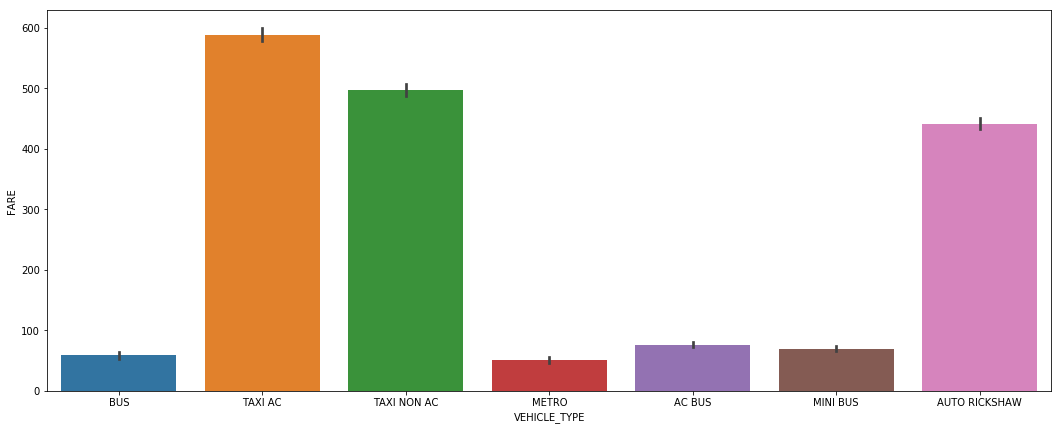

In [240]:
a4_dims = (18,7)

fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(x='VEHICLE_TYPE',y='FARE',data=fd,ax=ax)

In [241]:
f2=fd[['VEHICLE_TYPE','FARE']]
# In[391]:
f3=f2.groupby('VEHICLE_TYPE')
# In[392]:
f3.count()
# In[393]:
f3.mean()

,FARE
VEHICLE_TYPE,
AC BUS,76.374572
AUTO RICKSHAW,441.549829
BUS,58.495373
METRO,51.184810
MINI BUS,69.066456
TAXI AC,588.609643
TAXI NON AC,496.990639


In [242]:
x=f1.corr()

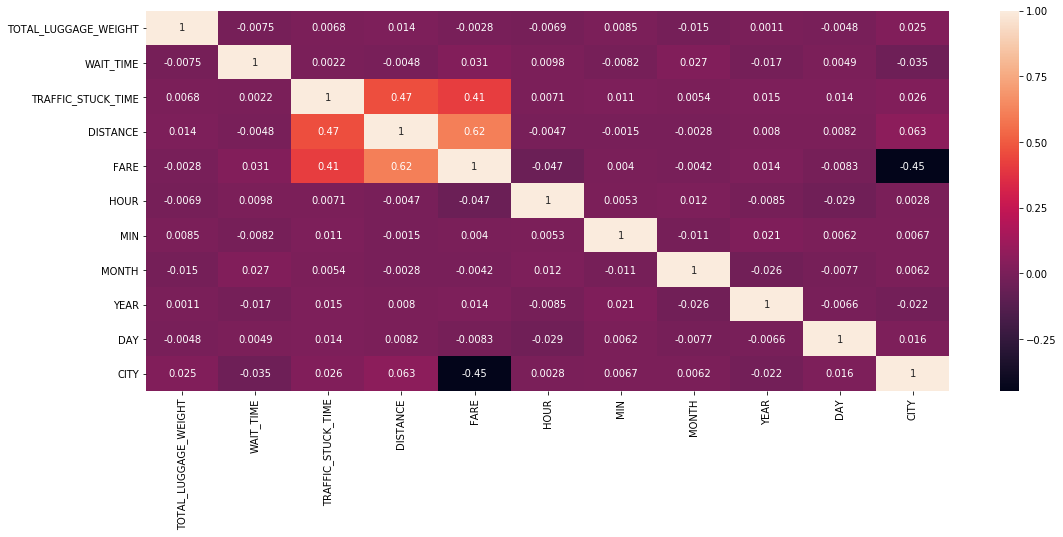

In [244]:

fig, ax = plt.subplots(figsize=(18,7))

sns.heatmap(x,annot=True,ax=ax)

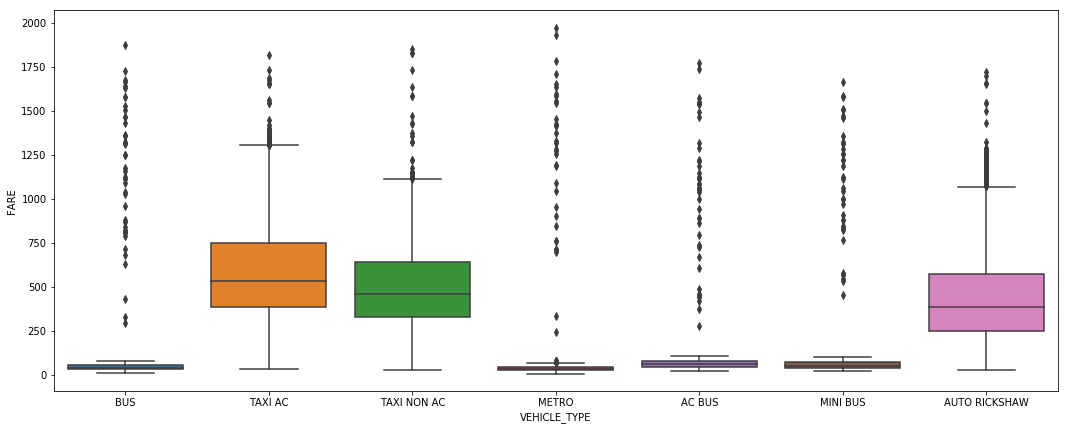

In [245]:
a4_dims = (18,7)

fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(x='VEHICLE_TYPE',y='FARE',data=f2,width=.8, ax=ax)

In [246]:
f4=f3.count()

In [247]:
f4.sort_values('FARE')

,FARE
VEHICLE_TYPE,
METRO,2786
TAXI AC,2798
AUTO RICKSHAW,2799
TAXI NON AC,2850
BUS,2885
MINI BUS,2918
AC BUS,2964


In [98]:
f1.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
1,Taxi AC,7.0,9.0,66,34,985.99,22.5,4,1
2,Taxi Non AC,18.0,6.0,53,1,1085.33,5.0,2,2
6,taxi Non ac,22.0,0.0,61,34,586.36,16.5,2,4
8,Taxi AC,12.0,18.0,69,43,1122.08,14.5,0,2
10,Taxi AC,17.0,19.0,39,41,901.34,5.5,4,4


In [99]:
pip install geopy


The following command must be run outside of the IPython shell:

    $ pip install geopy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [100]:
from math import sin, cos, sqrt, atan2, radians

In [101]:
from geopy.distance import vincenty

In [102]:
#R = 6373.0  radius of earth
#dlon = lon2 - lon1
#dlat = lat2 - lat1

#a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#c = 2 * atan2(sqrt(a), sqrt(1 - a))

#distance = R * c



# Define the two points
#start = (start_latitute, start_longitude)
#stop = (stop_latitude, stop_longitude)

# Print the vincenty distance
#print(vincenty(start, stop).meters)

# Print the great circle distance
#print(great_circle(start, stop).meters)


In [318]:
def distance_calc (row):
    start = (row['STARTING_LATITUDE'], row['STARTING_LONGITUDE'])
    stop = (row['DESTINATION_LATITUDE'], row['DESTINATION_LONGITUDE'])

    return (vincenty(start, stop).meters)/1000

#fd['DIR_DISTANCE'] = fd.apply (lambda row: distance_calc (row),axis=1)



In [320]:
#fd.drop('DIR_DISTANCE',axis=1)

In [32]:
fd['VEHICLE_TYPE'].fillna('NOT_GIVEN')

0                  BUS
1              TAXI AC
2          TAXI NON AC
3                METRO
4                  BUS
5               AC BUS
6          TAXI NON AC
7                  BUS
8              TAXI AC
9                METRO
10             TAXI AC
11                 BUS
12            MINI BUS
13               METRO
14                 BUS
15               METRO
16            MINI BUS
17               METRO
18       AUTO RICKSHAW
19         TAXI NON AC
20              AC BUS
21               METRO
22         TAXI NON AC
23              AC BUS
24       AUTO RICKSHAW
25               METRO
26              AC BUS
27            MINI BUS
28       AUTO RICKSHAW
29                 BUS
             ...      
19970         MINI BUS
19971           AC BUS
19972            METRO
19973          TAXI AC
19974         MINI BUS
19975            METRO
19976          TAXI AC
19977    AUTO RICKSHAW
19978            METRO
19979           AC BUS
19980            METRO
19981          TAXI AC
19982      

In [33]:
fd.count()

VEHICLE_TYPE            20000
TOTAL_LUGGAGE_WEIGHT     5648
WAIT_TIME                5648
TRAFFIC_STUCK_TIME      20000
DISTANCE                20000
FARE                    20000
TIME                    20000
DAY                     20000
CITY                    20000
dtype: int64

In [34]:
#plt.scatter(x='DIR_DISTANCE',y='FARE',data=fd, hue='VEHICLE_TYPE')

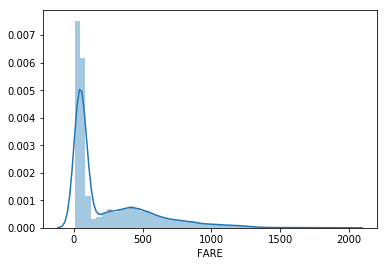

In [35]:
sns.distplot(fd['FARE'])

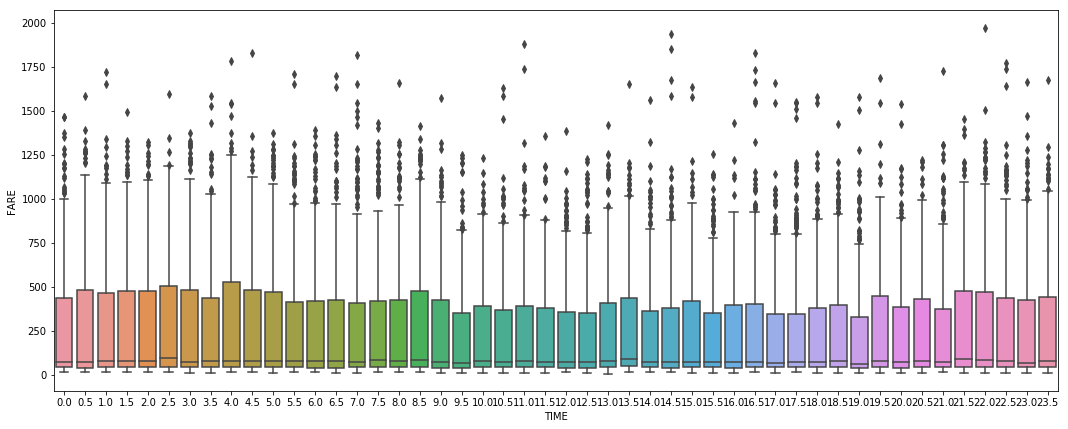

In [36]:

fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(x='TIME',y='FARE',data=fd,ax=ax,)

In [248]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY
0,BUS,NaN,NaN,8,34,32.09,6,59,1,2016,3,5
1,TAXI AC,7.0,9.0,66,34,985.99,22,23,6,2016,4,1
2,TAXI NON AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2,2
3,METRO,NaN,NaN,54,31,56.21,18,10,4,2016,1,1
4,BUS,NaN,NaN,33,44,30.62,1,51,6,2016,2,3


In [104]:
 # f_vip is  fd of auto and taxi
f_vip=pd.DataFrame(columns=fd.columns)
f_ord=pd.DataFrame(columns=fd.columns)


In [250]:
arr=[]

In [251]:
for i in range(0,fd.index.size):
    if fd['VEHICLE_TYPE'][i] in ('AUTO RICKSHAW','TAXI AC','TAXI NON AC'):
        arr.append(1)
    else:
        arr.append(0)

In [252]:
fd['SPL']=arr

In [315]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,2,0,0,8,34,1124,6,59,0,1,3,5,0,0
1,5,7,10,66,34,12960,22,23,5,1,4,1,1,1
2,6,18,7,53,1,13180,4,55,2,1,2,2,1,0
3,3,0,0,54,31,3230,18,10,3,1,1,1,0,1
4,2,0,0,33,44,994,1,51,5,1,2,3,0,0


In [254]:
arr=[]

In [255]:
arr

[]

In [256]:
fd['VEHICLE_TYPE'].unique()

array(['BUS', 'TAXI AC', 'TAXI NON AC', 'METRO', 'AC BUS', 'MINI BUS',
       'AUTO RICKSHAW'], dtype=object)

In [257]:
for i in range(0,fd.index.size):
    if fd['VEHICLE_TYPE'][i] in ('AC BUS','TAXI AC','METRO'):
        arr.append(1)
    else:
        arr.append(0)

In [258]:
fd['AC']=arr

In [259]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,BUS,NaN,NaN,8,34,32.09,6,59,1,2016,3,5,0,0
1,TAXI AC,7.0,9.0,66,34,985.99,22,23,6,2016,4,1,1,1
2,TAXI NON AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2,2,1,0
3,METRO,NaN,NaN,54,31,56.21,18,10,4,2016,1,1,0,1
4,BUS,NaN,NaN,33,44,30.62,1,51,6,2016,2,3,0,0


In [261]:
fd=fd.fillna(-1)

In [28]:

for i in range(0,fd.index.size):
    if fd['VEHICLE_TYPE'][i] in ('AUTO RICKSHAW','TAXI AC','TAXI NON AC'):
        f_vip=f_vip.append(fd.iloc[[i]])
    else:
        f_ord=f_ord.append(fd.iloc[[i]])

         

In [262]:
fd.head()


,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,BUS,-1.0,-1.0,8,34,32.09,6,59,1,2016,3,5,0,0
1,TAXI AC,7.0,9.0,66,34,985.99,22,23,6,2016,4,1,1,1
2,TAXI NON AC,18.0,6.0,53,1,1085.33,4,55,3,2016,2,2,1,0
3,METRO,-1.0,-1.0,54,31,56.21,18,10,4,2016,1,1,0,1
4,BUS,-1.0,-1.0,33,44,30.62,1,51,6,2016,2,3,0,0


In [263]:
f_vip.head()

VEHICLE_TYPE           NaN
TOTAL_LUGGAGE_WEIGHT   NaN
WAIT_TIME              NaN
TRAFFIC_STUCK_TIME     NaN
DISTANCE               NaN
dtype: float64

In [395]:
f_ord.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
0,BUS,NaN,NaN,8,34,32.09,7.0,3,5
3,METRO,NaN,NaN,54,31,56.21,18.0,1,1
4,BUS,NaN,NaN,33,44,30.62,2.0,2,3
5,AC BUS,NaN,NaN,23,43,59.82,16.0,4,4
7,BUS,NaN,NaN,28,18,32.27,9.0,3,6


In [396]:
f_vip.reset_index(inplace=True,drop=True)
f_ord.reset_index(inplace=True,drop=True)

In [397]:
f_vip.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
0,TAXI AC,7.0,9.0,66,34,985.99,22.5,4,1
1,TAXI NON AC,18.0,6.0,53,1,1085.33,5.0,2,2
2,TAXI NON AC,22.0,0.0,61,34,586.36,16.5,2,4
3,TAXI AC,12.0,18.0,69,43,1122.08,14.5,0,2
4,TAXI AC,17.0,19.0,39,41,901.34,5.5,4,4


In [398]:
f_ord.drop('WAIT_TIME',axis=1,inplace=True)
f_ord.drop('TOTAL_LUGGAGE_WEIGHT',axis=1,inplace=True)

In [399]:
f_ord.head()

,VEHICLE_TYPE,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
0,BUS,8,34,32.09,7.0,3,5
1,METRO,54,31,56.21,18.0,1,1
2,BUS,33,44,30.62,2.0,2,3
3,AC BUS,23,43,59.82,16.0,4,4
4,BUS,28,18,32.27,9.0,3,6


In [400]:

f_ord.count()

VEHICLE_TYPE          11553
TRAFFIC_STUCK_TIME    11553
DISTANCE              11553
FARE                  11553
TIME                  11553
DAY                   11553
CITY                  11553
dtype: int64

In [401]:
f_vip.count()

VEHICLE_TYPE            8447
TOTAL_LUGGAGE_WEIGHT    5648
WAIT_TIME               5648
TRAFFIC_STUCK_TIME      8447
DISTANCE                8447
FARE                    8447
TIME                    8447
DAY                     8447
CITY                    8447
dtype: int64

In [416]:
f_vip.dtypes

VEHICLE_TYPE             object
TOTAL_LUGGAGE_WEIGHT    float64
WAIT_TIME               float64
TRAFFIC_STUCK_TIME        int64
DISTANCE                  int64
FARE                    float64
TIME                    float64
DAY                       int64
CITY                      int64
dtype: object

In [417]:
f_ord.dtypes

VEHICLE_TYPE           object
TRAFFIC_STUCK_TIME     object
DISTANCE                int64
FARE                  float64
TIME                  float64
DAY                     int64
CITY                    int64
dtype: object

In [418]:
f_vip[['TRAFFIC_STUCK_TIME','DISTANCE','DAY','CITY']]=f_vip[['TRAFFIC_STUCK_TIME','DISTANCE','DAY','CITY']].apply(pd.to_numeric)
f_ord[['TRAFFIC_STUCK_TIME','DISTANCE','DAY','CITY']]=f_ord[['TRAFFIC_STUCK_TIME','DISTANCE','DAY','CITY']].apply(pd.to_numeric)

In [419]:
f_ord.describe()

,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
count,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000,11553.000000
mean,29.905652,30.553017,63.989456,11.766208,3.016273,3.519432
std,21.908221,12.105370,133.043721,6.881912,1.992605,1.756958
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,12.000000,22.000000,34.350000,6.000000,1.000000,2.000000
50%,26.000000,31.000000,45.690000,12.000000,3.000000,4.000000
75%,44.000000,40.000000,64.070000,17.500000,5.000000,5.000000
max,95.000000,99.000000,1972.000000,23.500000,6.000000,6.000000


In [420]:
f_ord.head()

,VEHICLE_TYPE,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
0,BUS,8,34,32.09,7.0,3,5
1,METRO,54,31,56.21,18.0,1,1
2,BUS,33,44,30.62,2.0,2,3
3,AC BUS,23,43,59.82,16.0,4,4
4,BUS,28,18,32.27,9.0,3,6


In [421]:
f_vip.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
0,TAXI AC,7.0,9.0,66,34,985.99,22.5,4,1
1,TAXI NON AC,18.0,6.0,53,1,1085.33,5.0,2,2
2,TAXI NON AC,22.0,0.0,61,34,586.36,16.5,2,4
3,TAXI AC,12.0,18.0,69,43,1122.08,14.5,0,2
4,TAXI AC,17.0,19.0,39,41,901.34,5.5,4,4


In [422]:
#'O'     (Python) objects
f_ord=f_ord.convert_objects(convert_numeric=True)
f_vip=f_vip.convert_objects(convert_numeric=True)
#f_ord['TRAFFIC_STUCK_TIME']=f_ord['TRAFFIC_STUCK_TIME'].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [423]:
f_ord['DISTANCE'].dtype
f_ord['TRAFFIC_STUCK_TIME'].dtype


dtype('int64')

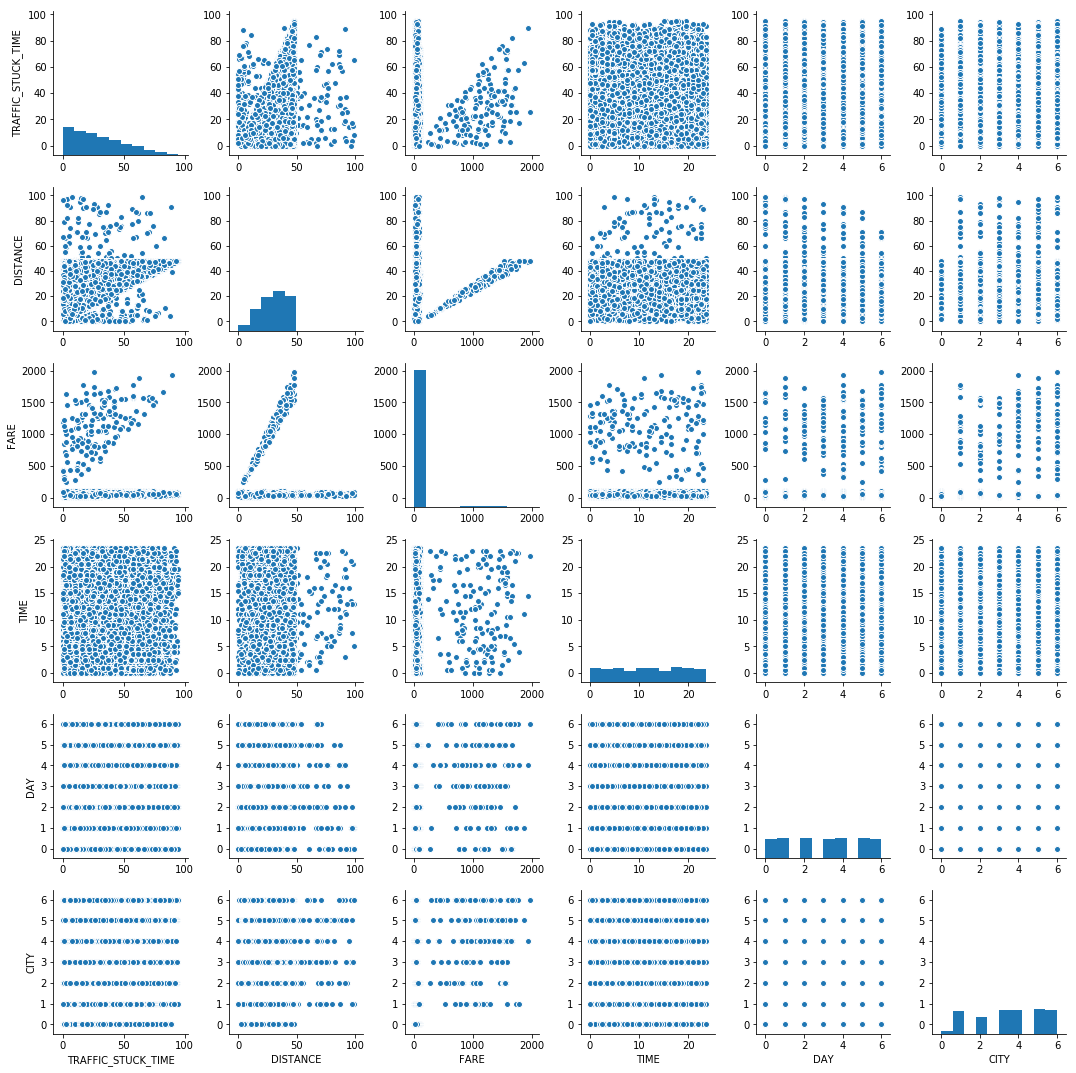

In [424]:
sns.pairplot(f_ord)

In [425]:
#fig, ax = plt.subplots(figsize=(18,7))
#sns.boxplot(x='VEHICLE_TYPE',y='FARE',data=f_ord,hue='DAY',ax=ax,)

In [426]:
f_ord.head()

,VEHICLE_TYPE,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
0,BUS,8,34,32.09,7.0,3,5
1,METRO,54,31,56.21,18.0,1,1
2,BUS,33,44,30.62,2.0,2,3
3,AC BUS,23,43,59.82,16.0,4,4
4,BUS,28,18,32.27,9.0,3,6


In [427]:
f1=f_ord.sort_values(by=['DISTANCE'],ascending=False)
#f1=f_ord.sort_values(by=['FARE'],ascending=False)
f1.head(n=50)

,VEHICLE_TYPE,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY
10285,MINI BUS,8,99,39.70,5.0,0,6
1082,MINI BUS,65,99,91.05,13.0,1,1
4745,METRO,15,98,20.00,20.5,1,3
11531,MINI BUS,17,97,68.33,7.5,1,1
5218,AC BUS,4,97,46.40,13.0,2,5
10130,MINI BUS,0,96,48.36,21.0,1,6
679,METRO,14,96,39.29,13.5,0,3
2674,AC BUS,14,95,80.00,16.0,0,4
5620,AC BUS,26,93,73.16,13.0,3,2
10698,METRO,37,92,31.43,11.0,0,5


In [ ]:

sns.lmplot(y='FARE',x='DISTANCE',data=f_ord,hue='TIME',fit_reg=False)

In [ ]:
sns.distplot(fd['TIME'])

In [ ]:
sns.distplot(fd['FARE'])

In [ ]:
sns.rugplot(fd['FARE'],axis=1)

In [ ]:
sns.rugplot(fd['TIME'],axis=1)

In [119]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY,SPL,AC
0,BUS,-1.0,-1.0,8,34,32.09,7.0,3,5,0,0
1,TAXI AC,7.0,9.0,66,34,985.99,22.5,4,1,1,1
2,TAXI NON AC,18.0,6.0,53,1,1085.33,5.0,2,2,1,0
3,METRO,-1.0,-1.0,54,31,56.21,18.0,1,1,0,1
4,BUS,-1.0,-1.0,33,44,30.62,2.0,2,3,0,0


In [88]:
arr=np.array(fd[['STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LATITUDE','DESTINATION_LONGITUDE']])

In [89]:
arr

array([[ 13.044677,  80.235723,  13.178228,  80.163277],
       [ 28.63958 ,  77.074113,  28.587288,  76.971306],
       [ 25.373881,  82.96957 ,  25.349656,  82.992587],
       ..., 
       [ 13.012673,  80.209958,  13.053211,  80.206934],
       [ 13.006869,  77.510779,  12.860101,  77.520207],
       [ 12.890407,  77.464352,  12.987765,  77.636698]])

In [65]:
from sklearn.cluster import KMeans

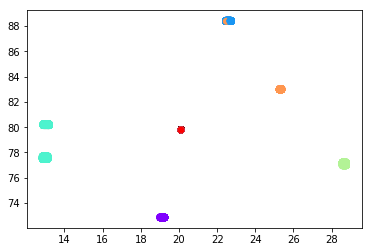

In [261]:

km=KMeans(n_clusters=6)
km.fit(arr)

plt.scatter(arr[:,0],arr[:,1],c=km.labels_,cmap='rainbow')
   

In [262]:
km.labels_

array([2, 3, 4, ..., 2, 2, 2])

In [42]:
km.cluster_centers_

array([[ 19.13233346,  72.86036408],
       [ 25.32465818,  82.99334287],
       [ 13.11572042,  80.19718223],
       [ 28.65991263,  77.03153315],
       [ 22.5956685 ,  88.41347646],
       [ 20.11144455,  79.79413522],
       [ 13.06511958,  77.58972468],
       [ 28.66699598,  77.16929747],
       [ 12.91687204,  77.5901084 ],
       [ 12.95191092,  80.19661892]])

In [46]:
km.labels_

array([2, 3, 1, ..., 9, 6, 8])

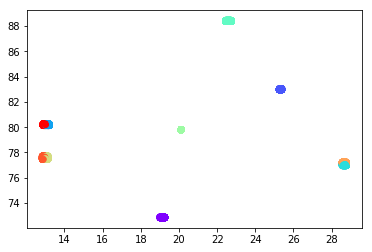

In [63]:
plt.scatter(arr[:,0],arr[:,1],c=km.labels_,cmap='rainbow')

In [58]:
arr[0][:,0]

IndexError: too many indices for array

In [59]:
arr

array([[ 13.044677,  80.235723],
       [ 28.63958 ,  77.074113],
       [ 25.373881,  82.96957 ],
       ..., 
       [ 13.012673,  80.209958],
       [ 13.006869,  77.510779],
       [ 12.890407,  77.464352]])

In [62]:
arr[:,0]

array([ 13.044677,  28.63958 ,  25.373881, ...,  13.012673,  13.006869,
        12.890407])

In [47]:
from sklearn.datasets import make_blobs

In [48]:
data=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.9,random_state=101)

In [428]:
data.head()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,Bus,NaN,NaN,8,34,32.09,7.0,3
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,Taxi AC,7.0,9.0,66,34,985.99,22.5,4
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,Taxi Non AC,18.0,6.0,53,1,1085.33,5.0,2
3,4,2016-04-26 18:10:09,NaN,NaN,28.758384,77.011422,Metro,NaN,NaN,54,31,56.21,18.0,1
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,bus,NaN,NaN,33,44,30.62,2.0,2


In [429]:
data[0][:,0]

KeyError: 0

In [264]:
#label incoder  string to hash
from sklearn.preprocessing import LabelEncoder

fd=fd.apply(LabelEncoder().fit_transform)
f_ord=f_ord.apply(LabelEncoder().fit_transform)
f_vip=f_vip.apply(LabelEncoder().fit_transform)

ValueError: bad input shape ()

In [265]:


fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,2,0,0,8,34,1124,6,59,0,1,3,5,0,0
1,5,7,10,66,34,12960,22,23,5,1,4,1,1,1
2,6,18,7,53,1,13180,4,55,2,1,2,2,1,0
3,3,0,0,54,31,3230,18,10,3,1,1,1,0,1
4,2,0,0,33,44,994,1,51,5,1,2,3,0,0


# All  calculations for f_ord......

In [317]:
from sklearn.preprocessing import StandardScaler

x=f_ord.drop('FARE',axis=1)
y=f_ord['FARE']

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.40,random_state=101)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [318]:
scalar=StandardScaler()


In [441]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [323]:
lin=LinearRegression()

scalar.fit(x_train)

x_train=scalar.transform(x_train)
#y_train=scalar.transform(y_train)

In [324]:
x_train

array([[ 1.51283889,  0.80505186,  2.1534415 , ...,  0.86206114,
         1.17084249, -0.86615171],
       [ 1.51283889,  2.37254055,  1.44040248, ..., -1.41863163,
         1.17084249, -0.86615171],
       [ 1.51283889,  2.01081239,  3.04474028, ...,  0.86206114,
         1.17084249, -0.86615171],
       ..., 
       [ 1.51283889,  0.6844758 ,  0.37084395, ...,  0.86206114,
         1.17084249, -0.86615171],
       [-1.48698328, -0.52128473, -0.52045482, ..., -0.84845844,
        -0.85408585,  1.15453216],
       [ 1.51283889, -0.15955657,  2.68822077, ..., -0.84845844,
         1.17084249, -0.86615171]])

In [444]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [445]:
pred=lin.predict(x_test)

In [446]:
metrics.r2_score(y_test,pred)

0.38685208111385994

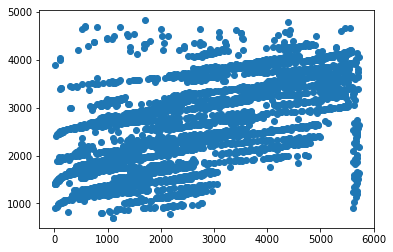

In [447]:
plt.scatter(y_test,pred)

In [448]:
lin.coef_

array([ -1.29561238e+02,   4.18197627e-01,   1.51822181e+01,
        -1.63668970e-01,   4.23957713e+00,  -5.05088534e+02])

In [449]:
lin.intercept_

4069.4221237714473

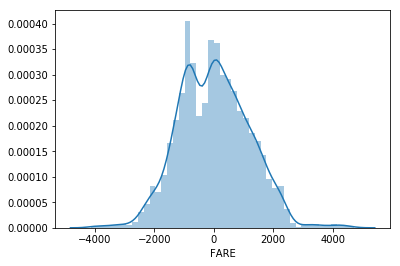

In [452]:
sns.distplot(y_test-pred)

In [453]:
from sklearn.neighbors import KNeighborsRegressor

In [454]:
knn=KNeighborsRegressor()

In [455]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [457]:
pred=knn.predict(x_test)

In [458]:
metrics.r2_score(y_test,pred)

0.23772775525562662

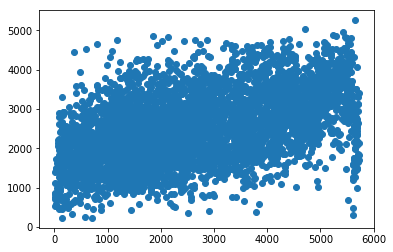

In [459]:
plt.scatter(y_test,pred)

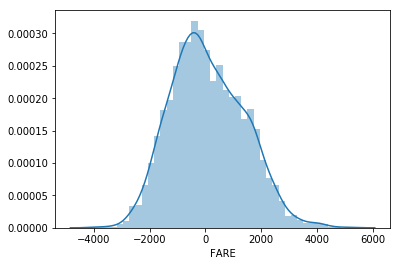

In [460]:
sns.distplot(y_test-pred)

In [461]:
from sklearn.tree import DecisionTreeRegressor

In [463]:
dtree=DecisionTreeRegressor()

In [467]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [468]:
pred=dtree.predict(x_test)

In [469]:
metrics.r2_score(y_test,pred)

0.79157669570112499

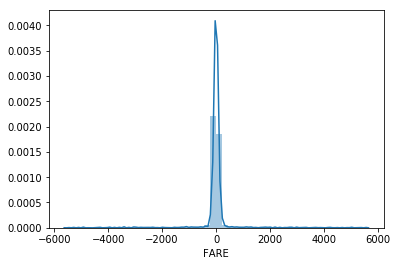

In [470]:
sns.distplot(y_test-pred)

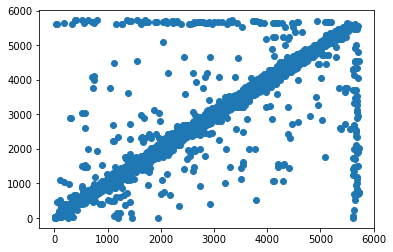

In [471]:
plt.scatter(y_test,pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [472]:
r_forest=RandomForestRegressor()

In [473]:
r_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [474]:
pred=r_forest.predict(x_test)

In [475]:
metrics.r2_score(y_test,pred)

0.87447054764586729

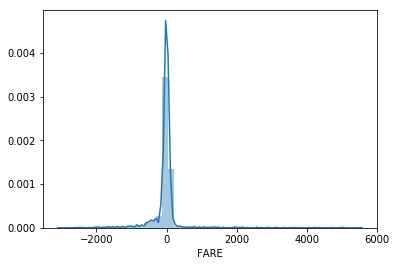

In [476]:
sns.distplot(y_test-pred)

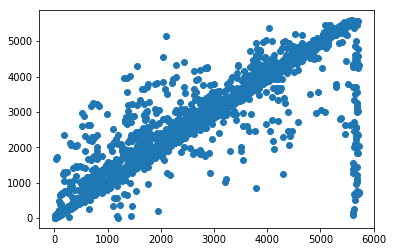

In [477]:
plt.scatter(y_test,pred)

# for f_vip 

In [478]:

x=f_vip.drop('FARE',axis=1)
y=f_vip['FARE']

from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.40,random_state=101)

In [479]:
tree=DecisionTreeRegressor()

In [480]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [481]:
pred=tree.predict(x_test)

In [482]:
metrics.r2_score(y_test,pred)

0.83665894723568091

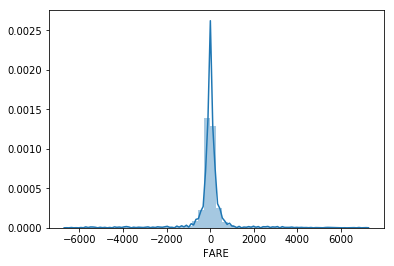

In [483]:
sns.distplot(y_test-pred)

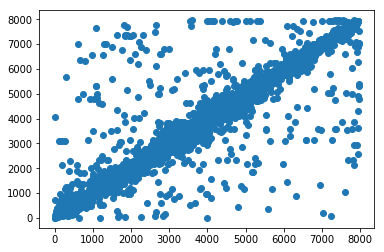

In [484]:
plt.scatter(y_test,pred)

In [ ]:
#random Forest

In [485]:
ran_f=RandomForestRegressor()

In [486]:
ran_f.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [488]:
pred=ran_f.predict(x_test)

In [489]:
metrics.r2_score(y_test,pred)

0.90737597220254851

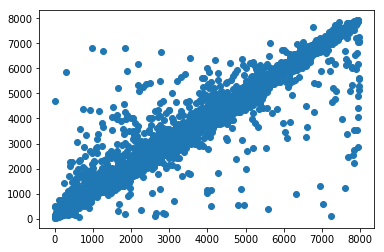

In [490]:
plt.scatter(y_test,pred)

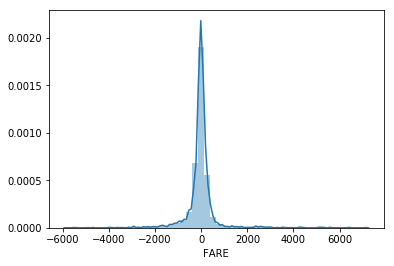

In [491]:
sns.distplot(y_test-pred)

In [133]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIME,DAY,CITY,SPL,AC
0,2,0,0,8,34,1124,14,3,5,0,0
1,5,7,10,66,34,12960,45,4,1,1,1
2,6,18,7,53,1,13180,10,2,2,1,0
3,3,0,0,54,31,3230,36,1,1,0,1
4,2,0,0,33,44,994,4,2,3,0,0


# For Fd ..................................

In [266]:
x=fd.drop('FARE',axis=1)
y=fd['FARE']

In [267]:
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=102)

In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
lir=LinearRegression()

In [270]:
lir.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [271]:
lir.coef_

array([ -3.56706685e+01,   2.15233724e+01,   4.10903753e+01,
         5.31781096e+00,   6.05106363e+01,  -1.01170264e+01,
         2.40854328e-02,  -6.20308496e-01,   2.80672493e+00,
         3.76809944e+00,  -5.36088643e+02,   6.33206353e+03,
         2.38528072e+02])

In [272]:
lir.intercept_

2633.7736764764509

In [273]:
new_d=pd.DataFrame(data=lir.coef_,index=x_train.columns,columns=['Coff'])

In [274]:
new_d


,Coff
VEHICLE_TYPE,-35.670668
TOTAL_LUGGAGE_WEIGHT,21.523372
WAIT_TIME,41.090375
TRAFFIC_STUCK_TIME,5.317811
DISTANCE,60.510636
HOUR,-10.117026
MIN,0.024085
MONTH,-0.620308
YEAR,2.806725
DAY,3.768099


In [275]:
pred=lir.predict(x_test)

In [276]:
pred

array([ 2112.97564449,  9925.49246796,  2938.11902443, ...,  3002.76495404,
        8529.29529831,  8988.21890607])

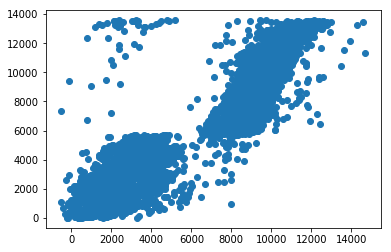

In [277]:

plt.scatter(pred,y_test)

ValueError: bins must increase monotonically.

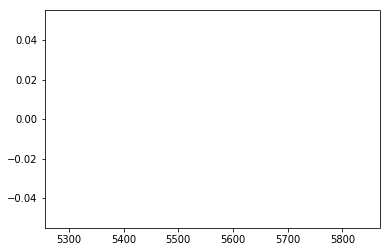

In [278]:
sns.distplot(y_test,pred)

In [279]:
from sklearn import metrics

In [280]:
metrics.r2_score(y_test,pred)

0.82697764539439866

In [281]:
from sklearn import metrics

In [282]:
metrics.mean_absolute_error(y_test,pred)

1211.3723407495954

In [283]:
metrics.mean_squared_error(y_test,pred)

2729727.4478899939

In [284]:
from sklearn.neighbors import KNeighborsRegressor

In [285]:
knn=KNeighborsRegressor()

In [286]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [287]:
pre_knn=knn.predict(x_test)

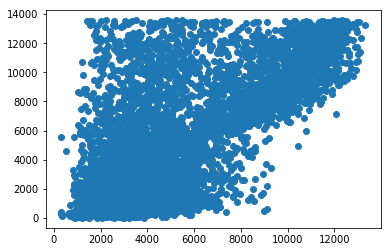

In [288]:
plt.scatter(pre_knn,y_test)

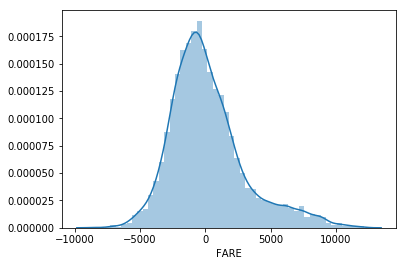

In [289]:
sns.distplot(y_test-pre_knn)

In [290]:
metrics.mean_absolute_error(y_test,pre_knn)

2151.6400333333331

In [291]:
metrics.mean_squared_error(y_test,pre_knn)

8437998.6251666658

# score and acc.

In [292]:
metrics.r2_score(y_test,pre_knn)

0.46516184558510598

In [293]:
from sklearn.tree import DecisionTreeRegressor

In [294]:
ds=DecisionTreeRegressor()

In [295]:
ds.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [296]:
pre_ds=ds.predict(x_test)

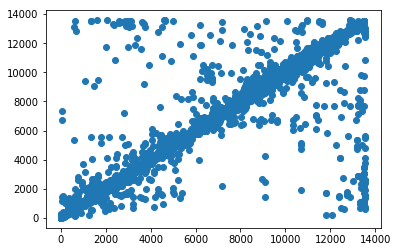

In [297]:
plt.scatter(pre_ds,y_test)

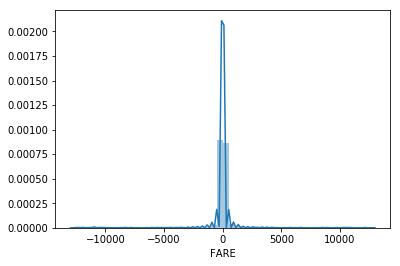

In [298]:
sns.distplot(y_test-pre_ds)

In [299]:
metrics.mean_absolute_error(y_test,pre_ds)

424.08966666666669

In [300]:
mse=metrics.mean_squared_error(y_test,pre_ds)

In [301]:
import math

In [302]:
math.sqrt(mse)

1578.8507001402422

# for score and accuracy

In [303]:
metrics.r2_score(y_test,pre_ds)

0.84199709957130464

In [304]:
#Forest 

In [305]:
from sklearn.ensemble import RandomForestRegressor

In [306]:
rfr=RandomForestRegressor()

In [307]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [308]:
pred_rfr=rfr.predict(x_test)

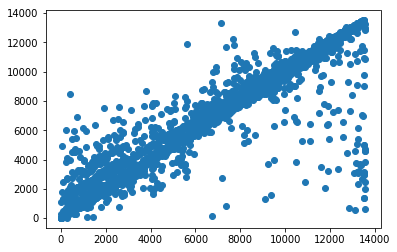

In [309]:
plt.scatter(y_test,pred_rfr)

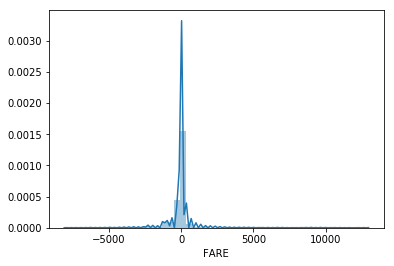

In [310]:
sns.distplot(y_test-pred_rfr)

In [311]:
metrics.r2_score(y_test,pred_rfr)

0.92359909594684386

In [312]:
fd.head()

,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,HOUR,MIN,MONTH,YEAR,DAY,CITY,SPL,AC
0,2,0,0,8,34,1124,6,59,0,1,3,5,0,0
1,5,7,10,66,34,12960,22,23,5,1,4,1,1,1
2,6,18,7,53,1,13180,4,55,2,1,2,2,1,0
3,3,0,0,54,31,3230,18,10,3,1,1,1,0,1
4,2,0,0,33,44,994,1,51,5,1,2,3,0,0


In [314]:
tst=pd.read_csv('intracity_fare_test.csv')

tst=rfr.predict(tst)

f1=fd
fd1=pd.DataFrame()
fd1=fd
pred_result=reg.predict(tst)
id_vec = np.array(tst.loc[:, tst.columns == 'ID'])
fd1['ID']=id_vec[:,0]
fd1['FARE']=pred_result
fd1.to_csv("answer.csv", index=False, header=True, sep='\n')

ValueError: could not convert string to float: 'Metro'